In [2]:
import pandas as pd
import numpy as np

### 1. Thu thập dữ liệu

In [3]:
# Dữ liệu về động đất từ USGS, lấy từ 2020 đến 2025 của vùng Đông Á
url = (
    "https://earthquake.usgs.gov/fdsnws/event/1/query.csv?"
    "starttime=2020-01-01"
    "&endtime=2025-01-01"
    "&minlatitude=18"
    "&maxlatitude=53"
    "&minlongitude=87"
    "&maxlongitude=146"
    "&minmagnitude=3.0"
)
df = pd.read_csv(url)
# Hiển thị toàn bộ dữ liệu của df
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None) 
display(df)



,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-12-31T18:52:07.759Z,24.3085,121.6904,30.380,3.9,mwr,53.0,55,0.160,1.00,...,2025-03-08T22:39:08.040Z,"37 km NNE of Hualien City, Taiwan",earthquake,3.42,4.686,0.065,23,reviewed,us,us
1,2024-12-31T16:28:31.896Z,30.3229,142.0685,10.000,4.3,mb,19.0,117,3.217,0.64,...,2025-03-08T22:39:17.040Z,"Izu Islands, Japan region",earthquake,7.26,1.908,0.169,13,reviewed,us,us
2,2024-12-31T12:04:00.736Z,18.6733,145.4794,206.878,3.7,mb,19.0,148,3.426,0.56,...,2025-03-08T22:39:17.040Z,"Pagan region, Northern Mariana Islands",earthquake,12.84,10.833,0.146,12,reviewed,us,us
3,2024-12-30T09:20:53.874Z,28.0377,128.0619,10.000,4.4,mb,31.0,87,1.212,0.78,...,2025-03-08T22:39:13.040Z,"86 km WNW of Amagi, Japan",earthquake,5.28,1.614,0.123,20,reviewed,us,us
4,2024-12-30T05:14:36.140Z,23.4756,123.4996,10.000,4.3,mb,33.0,132,1.083,0.68,...,2025-03-08T22:39:13.040Z,"117 km SW of Ishigaki, Japan",earthquake,4.17,1.921,0.142,14,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9690,2020-01-01T16:01:20.910Z,24.5787,142.1370,10.000,4.4,mb,NaN,151,2.506,0.50,...,2020-03-21T17:13:48.040Z,"Volcano Islands, Japan region",earthquake,11.80,1.900,0.139,15,reviewed,us,us
9691,2020-01-01T07:00:45.869Z,36.1566,143.8215,10.000,4.3,mb,NaN,120,4.485,0.91,...,2020-03-21T17:13:48.040Z,"273 km E of Hasaki, Japan",earthquake,8.10,1.400,0.130,17,reviewed,us,us
9692,2020-01-01T03:01:58.092Z,29.0289,105.0195,10.000,4.8,mb,NaN,33,4.088,0.73,...,2020-03-21T17:13:23.040Z,"41 km SE of Zigong, China",earthquake,7.60,1.900,0.069,65,reviewed,us,us
9693,2020-01-01T01:12:17.070Z,41.8487,142.5714,68.530,4.3,mb,NaN,120,0.467,0.65,...,2020-03-21T17:13:05.040Z,"56 km SSE of Shizunai-furukawach?, Japan",earthquake,8.70,7.400,0.128,17,reviewed,us,us


### 2. Tiền xử lí dữ liệu


In [5]:
df.dropna(inplace=True)  # -  loại bỏ tất cả các hàng chứa giá trị NaN (giá trị rỗng hoặc bị thiếu) trong DataFrame
df.drop_duplicates(inplace=True) # - loại bỏ các hàng trùng lặp trong DataFrame df, giữ lại chỉ một bản duy nhất của mỗi giá trị.

In [6]:
df['time'] = pd.to_datetime(df['time'])
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

### 3. Phân tích dữ liệu

In [7]:
df['magType'].unique()
df['magType'].value_counts()

magType
mb     4672
mww     468
mwr     366
ml        3
mwb       1
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5510 entries, 0 to 5509
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             5510 non-null   datetime64[ns, UTC]
 1   latitude         5510 non-null   float64            
 2   longitude        5510 non-null   float64            
 3   depth            5510 non-null   float64            
 4   mag              5510 non-null   float64            
 5   magType          5510 non-null   object             
 6   nst              5510 non-null   float64            
 7   gap              5510 non-null   int64              
 8   dmin             5510 non-null   float64            
 9   rms              5510 non-null   float64            
 10  net              5510 non-null   object             
 11  id               5510 non-null   object             
 12  updated          5510 non-null   object             
 13  place            5510 n

In [9]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,day,month,year
count,5510.000000,5510.000000,5510.000000,5510.000000,5510.000000,5510.000000,5510.000000,5510.000000,5510.000000,5510.000000,5510.000000,5510.000000,5510.000000,5510.000000,5510.000000
mean,29.429762,131.649226,62.206915,4.480436,58.388203,101.132668,2.795783,0.660942,7.680341,4.347257,0.113038,41.995100,15.198548,7.039383,2023.136298
std,7.301947,15.120380,100.279203,0.384622,46.648616,37.489579,3.176532,0.198855,3.092776,2.712764,0.053945,62.623309,9.144657,3.375148,0.781507
min,18.005600,87.050200,2.610000,3.000000,7.000000,10.000000,0.031000,0.170000,0.810000,0.798000,0.020000,2.000000,1.000000,1.000000,2022.000000
25%,23.776725,121.926025,10.000000,4.200000,27.000000,74.000000,1.023250,0.520000,5.542500,1.888000,0.070000,12.000000,7.000000,4.000000,2023.000000
50%,28.792650,139.785850,20.430500,4.400000,43.000000,101.000000,2.116000,0.640000,7.510000,4.010500,0.102000,22.000000,15.000000,7.000000,2023.000000
75%,35.371825,142.429125,59.371500,4.600000,73.000000,127.000000,3.396500,0.780000,9.417500,6.343250,0.149000,44.000000,23.750000,10.000000,2024.000000
max,52.986000,145.997800,644.879000,7.500000,619.000000,297.000000,44.036000,1.400000,28.890000,31.263000,0.384000,801.000000,31.000000,12.000000,2024.000000


In [10]:
df['type'].value_counts() 

type
earthquake    5510
Name: count, dtype: int64

#### phân bố động đất theo năm



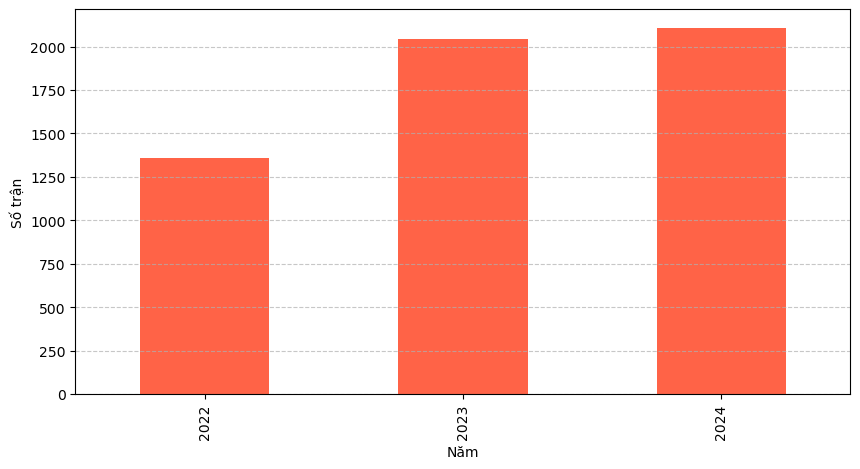

In [11]:
import matplotlib.pyplot as plt

df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year

count_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
count_by_year.plot(kind='bar', color='tomato')
# plt.title("Số lượng trận động đất theo năm (2000–2025)")
plt.xlabel("Năm")
plt.ylabel("Số trận")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


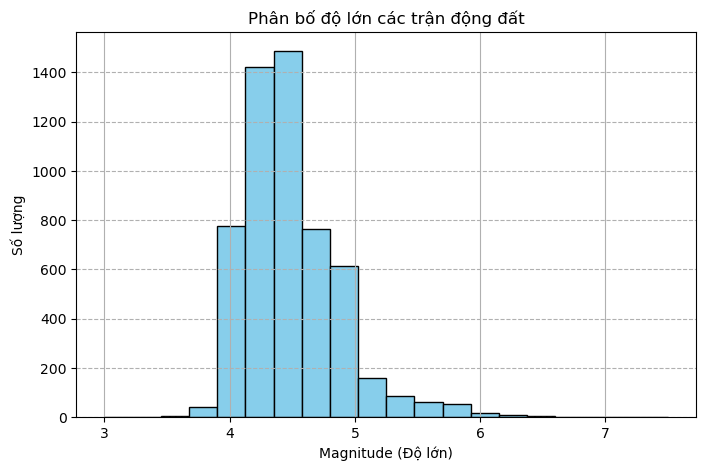

In [12]:
plt.figure(figsize=(8, 5))
df['mag'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Phân bố độ lớn các trận động đất")
plt.xlabel("Magnitude (Độ lớn)")
plt.ylabel("Số lượng")
plt.grid(axis='y', linestyle='--')
plt.show()


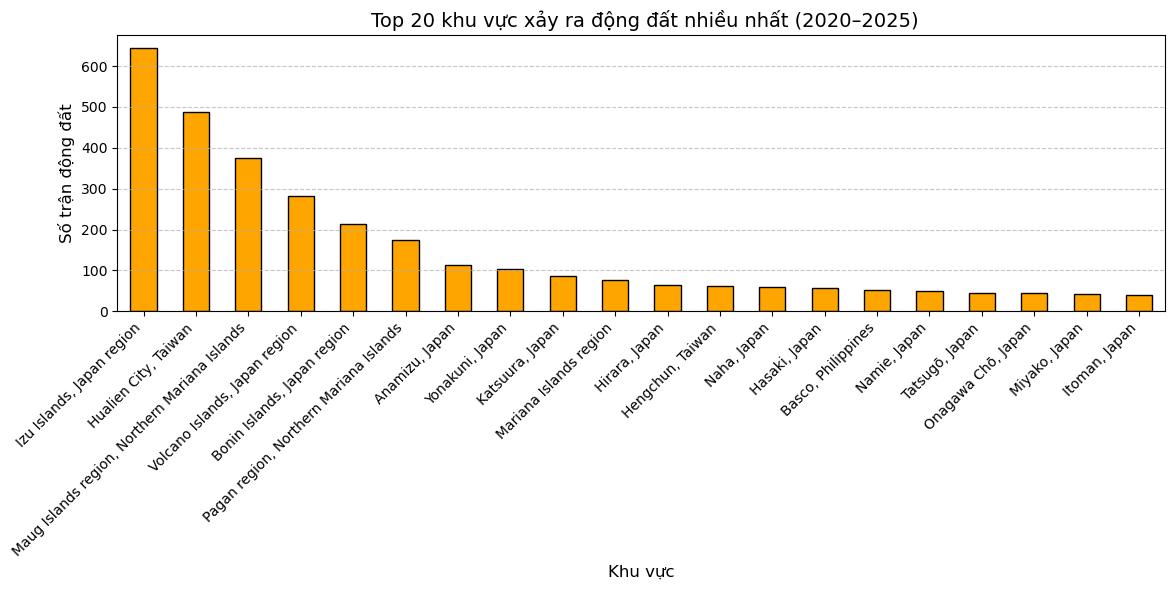

In [13]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Bước 1: Đọc dữ liệu từ file CSV
# url = (
#     "https://earthquake.usgs.gov/fdsnws/event/1/query?"
#     "format=csv"
#     "&starttime=2000-01-01"
#     "&endtime=2025-01-01"
#     "&minlatitude=8"
#     "&maxlatitude=24"
#     "&minlongitude=102"
#     "&maxlongitude=110"
#     "&minmagnitude=3.0"
# )
# df = pd.read_csv(url)  

# # Bước 2: Lọc các cột cần thiết
# columns_needed = ['time', 'latitude', 'longitude', 'depth', 'mag', 'place', 'type']
# df = df[columns_needed]

# # Bước 3: Làm sạch dữ liệu
# df.dropna(inplace=True)
# df['time'] = pd.to_datetime(df['time'])

# # Bước 4: Trích xuất tên khu vực từ cột "place"
def extract_location(place):
    if pd.isna(place):
        return "Không rõ"
    if "of" in place:
        return place.split("of")[-1].strip()
    return place.strip()

df['region'] = df['place'].apply(extract_location)

# Bước 5: Đếm số trận động đất theo khu vực (top 10)
top_regions = df['region'].value_counts().head(20)

# Bước 6: Vẽ biểu đồ
plt.figure(figsize=(12, 6))
top_regions.plot(kind='bar', color='orange', edgecolor='black')
plt.title(" Top 20 khu vực xảy ra động đất nhiều nhất (2020–2025)", fontsize=14)
plt.xlabel("Khu vực", fontsize=12)
plt.ylabel("Số trận động đất", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


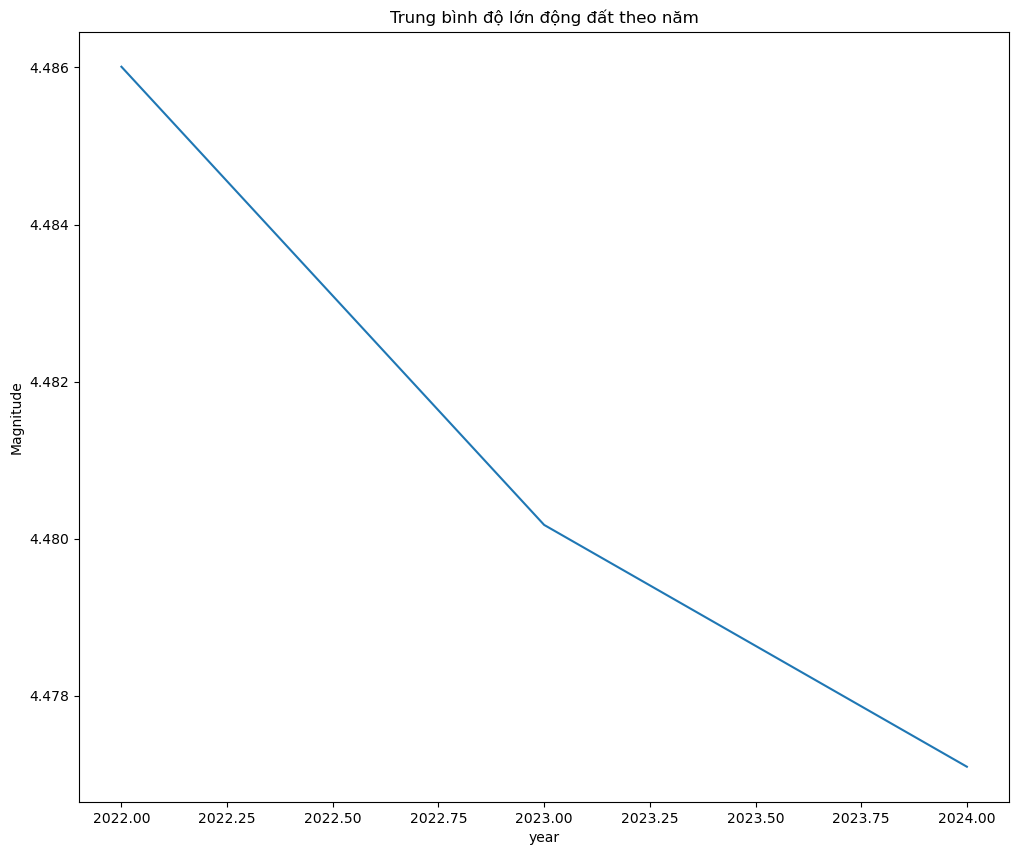

In [14]:
plt.figure(figsize=(12, 10))
df.groupby('year')['mag'].mean().plot(kind='line')
plt.title('Trung bình độ lớn động đất theo năm')
plt.ylabel('Magnitude')
plt.show()

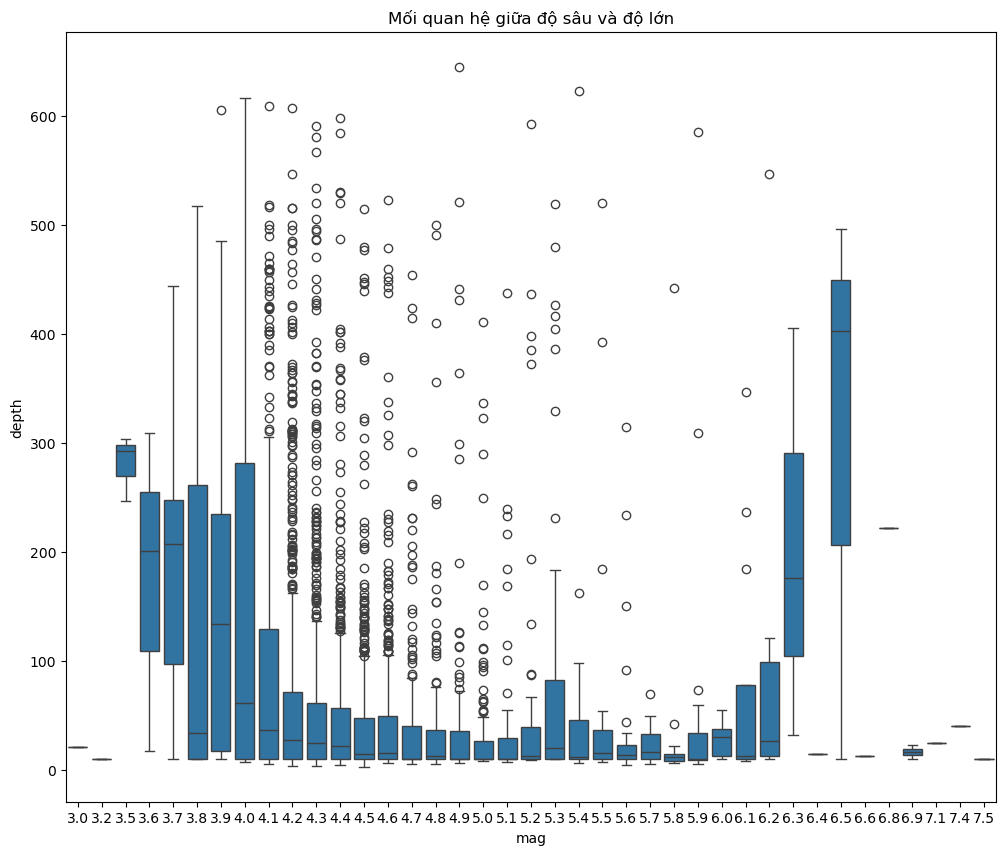

In [16]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x='mag', y='depth')
plt.title('Mối quan hệ giữa độ sâu và độ lớn')
plt.show()

#### Biểu đồ tương quan

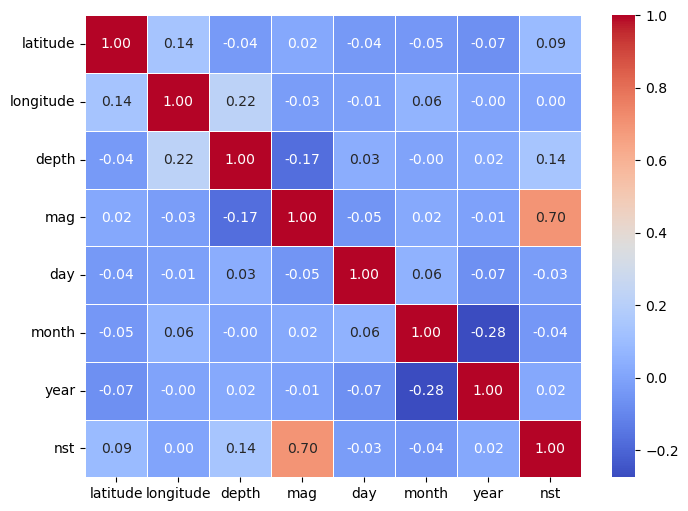

In [ ]:
import seaborn as sns
mx = df[['latitude', 'longitude', 'depth', 'mag', 'day','month','year','nst']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(mx, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

### 4. Mô hình dữ đoán

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['latitude', 'longitude', 'depth', 'day', 'month','year','nst']] 
y = df['mag'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_reg_lineal = LinearRegression()
model_reg_lineal.fit(X_train, y_train)

pred_reg_lineal = model_reg_lineal.predict(X_test)

mse_reg_lineal = mean_squared_error(y_test, pred_reg_lineal)
print("MSE for linearRegression: ",mse_reg_lineal)

MSE for linearRegression:  0.06842889756313639


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_knn = {'n_neighbors': range(1, 21)} 

knn_model = KNeighborsRegressor()

grid_search_knn = GridSearchCV(knn_model, param_knn, cv=5, scoring='neg_mean_squared_error')

grid_search_knn.fit(X_train, y_train)

model_knn = grid_search_knn.best_estimator_

pred_knn = model_knn.predict(X_test)

mse_knn = mean_squared_error(y_test, pred_knn)
print("MSE for KNN: ",mse_knn)

MSE for KNN:  0.06809877495462795


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 11)}

rf_regressor = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_rf_regressor = grid_search.best_estimator_
print("Best parameters for Random Forest:", grid_search.best_params_)

y_pred = best_rf_regressor.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
print("MSE for Random Forest:", mse_rf)

Best parameters for Random Forest: {'max_depth': 8}
MSE for Random Forest: 0.06998237184748518


In [ ]:
#18.6733	145.4794	206.878	 19.0 2024-12-31 3.7
ft = [18.6733, 145.4794, 206.878, 19.0, 2024, 12, 31]
sample = pd.DataFrame([ft], columns=['latitude', 'longitude', 'depth', 'nst', 'year', 'month', 'day'])
sample = sample[['latitude', 'longitude', 'depth', 'day', 'month','year','nst']]
pred = modelo_reg_lineal.predict(sample)
pred2 = mejor_modelo_knn.predict(sample)
pred3 = best_rf_regressor.predict(sample)
print(pred, pred2, pred3)

[4.14568457] [4.01] [3.79589882]


In [ ]:
#24.6414	121.8277	71.200 2022-04-23 116.0 4.3
ft = [24.6414, 121.8277, 71.200, 116.0 , 2022, 4, 23]
sample = pd.DataFrame([ft], columns=['latitude', 'longitude', 'depth','nst', 'year', 'month', 'day'])
sample = sample[['latitude', 'longitude', 'depth', 'day', 'month','year', 'nst']]
pred = modelo_reg_lineal.predict(sample)
pred2 = mejor_modelo_knn.predict(sample)
pred3 = best_rf_regressor.predict(sample)
print(pred, pred2, pred3)



[4.81649354] [4.735] [4.57155549]
